In [1]:
import sys
sys.path.append('../..')
import src.data.data_loader as dl
from src.features.vectorizer import Vectorizer
from src.models.topic_models import TopicModel
import src.visualization.doc_topic_vis as vis
from collections import defaultdict
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Maria\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
model_gea = "topic_models/lda/DEED_lda_german_editorial_articles_190.pkl"
threshold = 0.1
x_limit =20

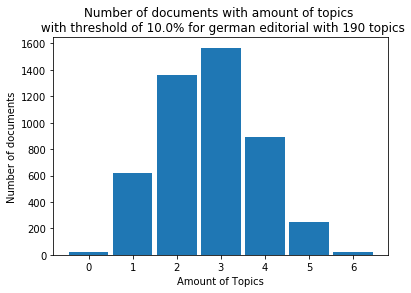

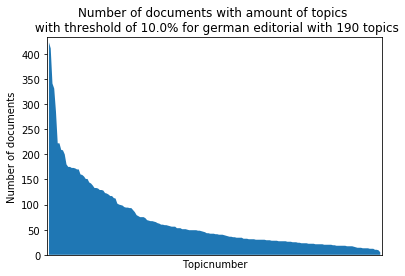

,0,1,2,3,4,5,6,7,8,9
Topic 47,prozent,umsatz,euro,milliarde,deutschland,million,vergangen,liegen,deutsch,wachsen
Topic 111,bio,bioprodukt,konventionell,nachfrage,konventionelle,markt,biobauern,steigen,umstellen,bauer
Topic 43,produkt,regional,kunde,region,lebensmittel,regionale,supermarkt,kaufen,finden,regionalität
Topic 152,prozent,hektar,fläche,betrieb,ökologisch,bewirtschaften,steigen,anteil,million,liegen
Topic 182,tier,schwein,stall,fleisch,tierhaltung,halten,massentierhaltung,haltung,platzen,rind
Topic 90,mitglied,projekt,landwirtschaft,idee,gemeinsam,vereinen,region,konzept,solidarisch,landwirt
Topic 145,österreich,wien,österreichisch,heimisch,bio,konsument,austria,biologisch,heuer,apa
Topic 54,hof,betreiben,familie,landwirt,verkaufen,hofladen,leben,vater,arbeit,stehen
Topic 107,kontrolle,behörde,fall,kontrollieren,kontrolleure,betrug,skandal,kontrollstellen,überprüfen,all
Topic 83,schmidt,bauer,verbraucher,landwirt,prozent,preisen,fordern,deutsch,berlin,deutschland


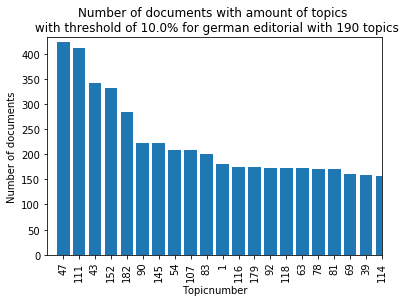

,0,1,2,3,4,5,6,7,8,9
Topic 47,prozent,umsatz,euro,milliarde,deutschland,million,vergangen,liegen,deutsch,wachsen
Topic 111,bio,bioprodukt,konventionell,nachfrage,konventionelle,markt,biobauern,steigen,umstellen,bauer
Topic 43,produkt,regional,kunde,region,lebensmittel,regionale,supermarkt,kaufen,finden,regionalität
Topic 152,prozent,hektar,fläche,betrieb,ökologisch,bewirtschaften,steigen,anteil,million,liegen
Topic 182,tier,schwein,stall,fleisch,tierhaltung,halten,massentierhaltung,haltung,platzen,rind
Topic 90,mitglied,projekt,landwirtschaft,idee,gemeinsam,vereinen,region,konzept,solidarisch,landwirt
Topic 145,österreich,wien,österreichisch,heimisch,bio,konsument,austria,biologisch,heuer,apa
Topic 54,hof,betreiben,familie,landwirt,verkaufen,hofladen,leben,vater,arbeit,stehen
Topic 107,kontrolle,behörde,fall,kontrollieren,kontrolleure,betrug,skandal,kontrollstellen,überprüfen,all
Topic 83,schmidt,bauer,verbraucher,landwirt,prozent,preisen,fordern,deutsch,berlin,deutschland


In [3]:
document_topic_matrix_gea,topicmodel_gea = vis.get_document_topic_matrix(model_gea)
k_gea, v_gea = vis.amount_topic_per_dokument(threshold, document_topic_matrix_gea)
vis.plot_amount_topic_per_document(model_gea,threshold, k_gea, v_gea)
#vis.plot_amount_doc_per_topic(threshold, document_topic_matrix,x_limit, sorted = False)
vis.plot_amount_doc_per_topic(model_gea,threshold,190,sorted = True)
#vis.plot_amount_doc_per_topic(model_gea,threshold,x_limit,sorted = True)
vis.plot_amount_doc_per_topic(model_gea,threshold,x_limit,sorted = True, bar = True)

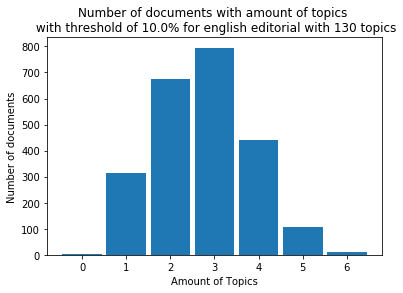

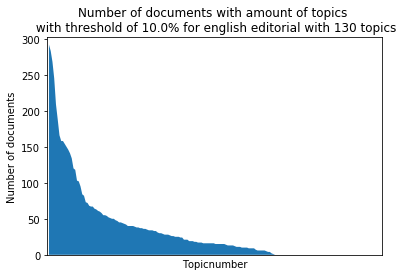

,0,1,2,3,4,5,6,7,8,9
Topic 112,people,think,make,just,like,thing,good,really,want,lot
Topic 83,study,health,pesticide,conventional,research,level,risk,exposure,produce,high
Topic 82,eat,healthy,health,diet,good,nutrition,process,day,vegetable,make
Topic 117,farming,agriculture,crop,farmer,soil,farm,conventional,world,grow,good
Topic 17,farmer,local,farm,market,produce,small,grow,locally,buy,good
Topic 66,label,product,natural,ingredient,use,consumer,mean,make,term,certify
Topic 104,company,product,brand,year,business,make,sell,consumer,new,base
Topic 46,$,percent,year,sale,market,accord,share,price,company,increase
Topic 105,price,$,cost,foods,store,product,brand,low,supermarket,good
Topic 114,farm,farmer,farming,crop,agriculture,acre,industrial,grow,land,government


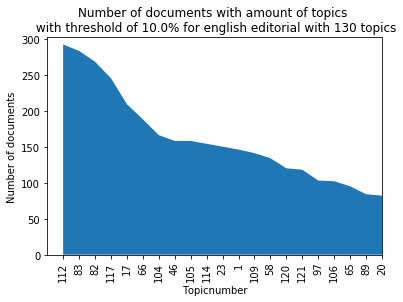

,0,1,2,3,4,5,6,7,8,9
Topic 112,people,think,make,just,like,thing,good,really,want,lot
Topic 83,study,health,pesticide,conventional,research,level,risk,exposure,produce,high
Topic 82,eat,healthy,health,diet,good,nutrition,process,day,vegetable,make
Topic 117,farming,agriculture,crop,farmer,soil,farm,conventional,world,grow,good
Topic 17,farmer,local,farm,market,produce,small,grow,locally,buy,good
Topic 66,label,product,natural,ingredient,use,consumer,mean,make,term,certify
Topic 104,company,product,brand,year,business,make,sell,consumer,new,base
Topic 46,$,percent,year,sale,market,accord,share,price,company,increase
Topic 105,price,$,cost,foods,store,product,brand,low,supermarket,good
Topic 114,farm,farmer,farming,crop,agriculture,acre,industrial,grow,land,government


In [4]:
model_eea = "topic_models/lda/ENED_lda_english_editorial_articles_130.pkl"

document_topic_matrix_eea,topicmodel_eea = vis.get_document_topic_matrix(model_eea)
k_eea, v_eea = vis.amount_topic_per_dokument(threshold, document_topic_matrix_eea)
vis.plot_amount_topic_per_document(model_eea,threshold, k_eea, v_eea)
vis.plot_amount_doc_per_topic(model_eea,threshold,190,sorted = True)
vis.plot_amount_doc_per_topic(model_eea,threshold,x_limit,sorted = True)

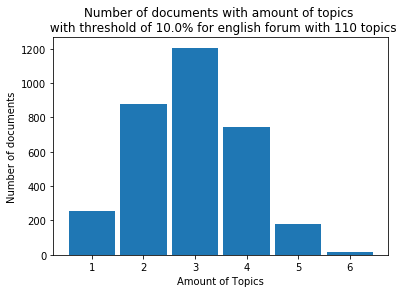

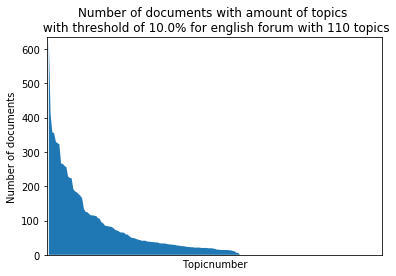

,0,1,2,3,4,5,6,7,8,9
Topic 62,organic,food,produce,good,grow,buy,pesticide,non,conventional,label
Topic 82,monsanto,people,food,gmo,make,farmer,need,world,seed,big
Topic 101,farming,use,land,farmer,crop,farm,agriculture,need,like,yield
Topic 14,organic,pesticide,use,food,chemical,fertilizer,farming,grow,crop,produce
Topic 15,organic,just,$,people,buy,know,food,need,make,like
Topic 35,food,eat,people,healthy,health,child,grow,just,good,live
Topic 18,buy,local,store,food,organic,market,grocery,good,produce,farmer
Topic 40,organic,food,study,>,good,pesticide,just,<url>,use,people
Topic 96,organic,farmer,thank,local,food,farm,grow,<url>,great,love
Topic 9,organic,product,online,food,good,store,buy,india,vegetable,<url>


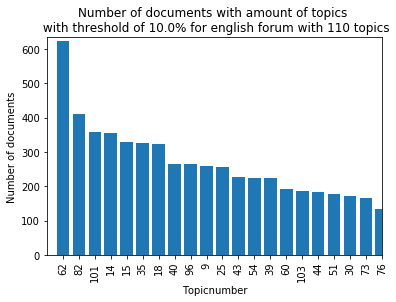

,0,1,2,3,4,5,6,7,8,9
Topic 62,organic,food,produce,good,grow,buy,pesticide,non,conventional,label
Topic 82,monsanto,people,food,gmo,make,farmer,need,world,seed,big
Topic 101,farming,use,land,farmer,crop,farm,agriculture,need,like,yield
Topic 14,organic,pesticide,use,food,chemical,fertilizer,farming,grow,crop,produce
Topic 15,organic,just,$,people,buy,know,food,need,make,like
Topic 35,food,eat,people,healthy,health,child,grow,just,good,live
Topic 18,buy,local,store,food,organic,market,grocery,good,produce,farmer
Topic 40,organic,food,study,>,good,pesticide,just,<url>,use,people
Topic 96,organic,farmer,thank,local,food,farm,grow,<url>,great,love
Topic 9,organic,product,online,food,good,store,buy,india,vegetable,<url>


In [5]:
model_ef = "topic_models/lda/ENFO_lda_english_forum_110.pkl"

document_topic_matrix_ef,topicmodel_ef = vis.get_document_topic_matrix(model_ef)
k_ef, v_ef = vis.amount_topic_per_dokument(threshold, document_topic_matrix_ef)
vis.plot_amount_topic_per_document(model_ef,threshold, k_ef, v_ef)
vis.plot_amount_doc_per_topic(model_ef,threshold,190,sorted = True)
vis.plot_amount_doc_per_topic(model_ef,threshold,x_limit,sorted = True,bar = True)

Epoch 10 reached after 0.649 seconds, error: 34.985462
Epoch 20 reached after 0.910 seconds, error: 34.961467
Epoch 30 reached after 1.185 seconds, error: 34.957539
Epoch 40 reached after 1.458 seconds, error: 34.956420
Epoch 50 reached after 1.731 seconds, error: 34.955985
Epoch 60 reached after 2.013 seconds, error: 34.955782
Epoch 70 reached after 2.308 seconds, error: 34.955674
Epoch 80 reached after 2.582 seconds, error: 34.955612
Epoch 90 reached after 2.866 seconds, error: 34.955573
Epoch 100 reached after 3.159 seconds, error: 34.955548
Epoch 110 reached after 3.429 seconds, error: 34.955530
Epoch 120 reached after 3.705 seconds, error: 34.955518
Epoch 130 reached after 3.968 seconds, error: 34.955509
Epoch 140 reached after 4.252 seconds, error: 34.955503
Epoch 150 reached after 4.526 seconds, error: 34.955498
Epoch 160 reached after 4.789 seconds, error: 34.955494
Epoch 170 reached after 5.073 seconds, error: 34.955491
Epoch 180 reached after 5.336 seconds, error: 34.955488
E

C:\Users\Maria\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1035: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


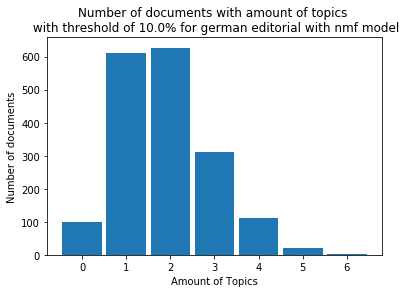

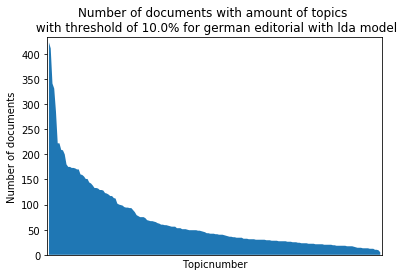

,0,1,2,3,4,5,6,7,8,9
Topic 47,prozent,umsatz,euro,milliarde,deutschland,million,vergangen,liegen,deutsch,wachsen
Topic 111,bio,bioprodukt,konventionell,nachfrage,konventionelle,markt,biobauern,steigen,umstellen,bauer
Topic 43,produkt,regional,kunde,region,lebensmittel,regionale,supermarkt,kaufen,finden,regionalität
Topic 152,prozent,hektar,fläche,betrieb,ökologisch,bewirtschaften,steigen,anteil,million,liegen
Topic 182,tier,schwein,stall,fleisch,tierhaltung,halten,massentierhaltung,haltung,platzen,rind
Topic 90,mitglied,projekt,landwirtschaft,idee,gemeinsam,vereinen,region,konzept,solidarisch,landwirt
Topic 145,österreich,wien,österreichisch,heimisch,bio,konsument,austria,biologisch,heuer,apa
Topic 54,hof,betreiben,familie,landwirt,verkaufen,hofladen,leben,vater,arbeit,stehen
Topic 107,kontrolle,behörde,fall,kontrollieren,kontrolleure,betrug,skandal,kontrollstellen,überprüfen,all
Topic 83,schmidt,bauer,verbraucher,landwirt,prozent,preisen,fordern,deutsch,berlin,deutschland


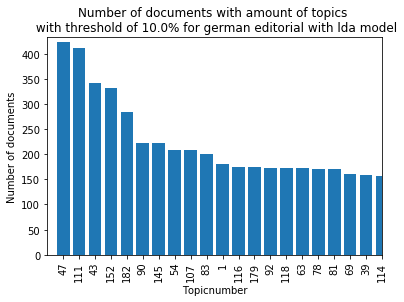

,0,1,2,3,4,5,6,7,8,9
Topic 47,prozent,umsatz,euro,milliarde,deutschland,million,vergangen,liegen,deutsch,wachsen
Topic 111,bio,bioprodukt,konventionell,nachfrage,konventionelle,markt,biobauern,steigen,umstellen,bauer
Topic 43,produkt,regional,kunde,region,lebensmittel,regionale,supermarkt,kaufen,finden,regionalität
Topic 152,prozent,hektar,fläche,betrieb,ökologisch,bewirtschaften,steigen,anteil,million,liegen
Topic 182,tier,schwein,stall,fleisch,tierhaltung,halten,massentierhaltung,haltung,platzen,rind
Topic 90,mitglied,projekt,landwirtschaft,idee,gemeinsam,vereinen,region,konzept,solidarisch,landwirt
Topic 145,österreich,wien,österreichisch,heimisch,bio,konsument,austria,biologisch,heuer,apa
Topic 54,hof,betreiben,familie,landwirt,verkaufen,hofladen,leben,vater,arbeit,stehen
Topic 107,kontrolle,behörde,fall,kontrollieren,kontrolleure,betrug,skandal,kontrollstellen,überprüfen,all
Topic 83,schmidt,bauer,verbraucher,landwirt,prozent,preisen,fordern,deutsch,berlin,deutschland


In [6]:
model_gec = "topic_models/nmf/DEEDCO_nmf_german_editorial_comments_170.pkl"

document_topic_matrix_gec,topicmodel_gec = vis.get_document_topic_matrix(model_gec)
k_gec, v_gec = vis.amount_topic_per_dokument(threshold, document_topic_matrix_gec)
vis.plot_amount_topic_per_document(model_gec,threshold, k_gec, v_gec)
vis.plot_amount_doc_per_topic(model_gea,threshold,190,sorted = True)
vis.plot_amount_doc_per_topic(model_gea,threshold,x_limit,sorted = True, bar = True)

Epoch 10 reached after 0.238 seconds, error: 18.382661
Epoch 20 reached after 0.316 seconds, error: 18.362074
Epoch 30 reached after 0.401 seconds, error: 18.358990
Epoch 40 reached after 0.470 seconds, error: 18.358091
Epoch 50 reached after 0.555 seconds, error: 18.357735
Epoch 60 reached after 0.670 seconds, error: 18.357566
Epoch 70 reached after 0.755 seconds, error: 18.357475
Epoch 80 reached after 0.840 seconds, error: 18.357422
Epoch 90 reached after 0.933 seconds, error: 18.357388
Epoch 100 reached after 1.002 seconds, error: 18.357366
Epoch 110 reached after 1.087 seconds, error: 18.357351
Epoch 120 reached after 1.187 seconds, error: 18.357340
Epoch 130 reached after 1.256 seconds, error: 18.357333
Epoch 140 reached after 1.341 seconds, error: 18.357327
Epoch 150 reached after 1.403 seconds, error: 18.357322
Epoch 160 reached after 1.488 seconds, error: 18.357319
Epoch 170 reached after 1.557 seconds, error: 18.357316
Epoch 180 reached after 1.657 seconds, error: 18.357314
E

C:\Users\Maria\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1035: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


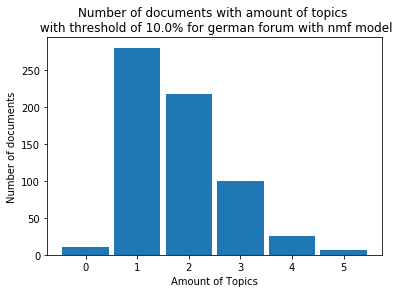

Epoch 10 reached after 0.185 seconds, error: 18.382661
Epoch 20 reached after 0.263 seconds, error: 18.362074
Epoch 30 reached after 0.363 seconds, error: 18.358990
Epoch 40 reached after 0.432 seconds, error: 18.358091
Epoch 50 reached after 0.518 seconds, error: 18.357735
Epoch 60 reached after 0.589 seconds, error: 18.357566
Epoch 70 reached after 0.680 seconds, error: 18.357475
Epoch 80 reached after 0.761 seconds, error: 18.357422
Epoch 90 reached after 0.842 seconds, error: 18.357388
Epoch 100 reached after 0.913 seconds, error: 18.357366
Epoch 110 reached after 0.994 seconds, error: 18.357351
Epoch 120 reached after 1.085 seconds, error: 18.357340
Epoch 130 reached after 1.186 seconds, error: 18.357333
Epoch 140 reached after 1.267 seconds, error: 18.357327
Epoch 150 reached after 1.348 seconds, error: 18.357322
Epoch 160 reached after 1.429 seconds, error: 18.357319
Epoch 170 reached after 1.500 seconds, error: 18.357316
Epoch 180 reached after 1.591 seconds, error: 18.357314
E

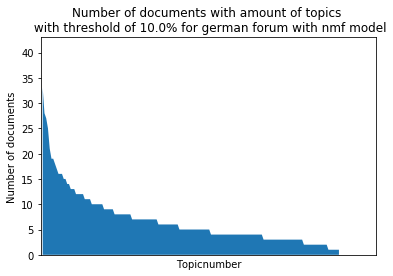

,0,1,2,3,4,5,6,7,8,9
Topic 0,kaufe,bio,kaufen,lg,gemüse,schmecken,einfach,supermarkt,essen,leisten
Topic 1,bio,lebensmittel,gesünder,produkt,bio-siegel,normal,drauf,normale,meinung,bier
Topic 4,landwirtschaft,ökologisch,konventionell,biologische,thema,begreifen,berücksichtigung,biologisch,erzeugnis,merkmal
Topic 11,fleisch,essen,metzger,jed,rind,wurst,kaufen,haltung,selber,geflügel
Topic 8,gemüse,obst,normal,usa,gesund,halt,saison,waschen,gesünder,vitamin
Topic 2,tier,haltung,schlachten,töten,sterben,leben,schwein,veganer,artgerecht,vegetarier
Topic 6,eiern,huhn,legen,bioeier,bodenhaltung,dotter,bio-eier,weiße,jed,braune
Topic 23,bioprodukt,gesünder,studie,belegen,regelmäßig,ernährung,inhaltsstoffe,essen,fühlen,produkt
Topic 18,apfel,belag,schimmeln,waschen,schokolade,fett,egal,schalen,kg,steuer
Topic 3,<url>,blog,blogs,bio-markt,suchen,lifestyle,empfehlenswert,finden,kleidung,straße


Epoch 10 reached after 0.202 seconds, error: 18.382661
Epoch 20 reached after 0.273 seconds, error: 18.362074
Epoch 30 reached after 0.354 seconds, error: 18.358990
Epoch 40 reached after 0.443 seconds, error: 18.358091
Epoch 50 reached after 0.516 seconds, error: 18.357735
Epoch 60 reached after 0.606 seconds, error: 18.357566
Epoch 70 reached after 0.699 seconds, error: 18.357475
Epoch 80 reached after 0.777 seconds, error: 18.357422
Epoch 90 reached after 0.858 seconds, error: 18.357388
Epoch 100 reached after 0.941 seconds, error: 18.357366
Epoch 110 reached after 1.012 seconds, error: 18.357351
Epoch 120 reached after 1.113 seconds, error: 18.357340
Epoch 130 reached after 1.202 seconds, error: 18.357333
Epoch 140 reached after 1.296 seconds, error: 18.357327
Epoch 150 reached after 1.381 seconds, error: 18.357322
Epoch 160 reached after 1.481 seconds, error: 18.357319
Epoch 170 reached after 1.565 seconds, error: 18.357316
Epoch 180 reached after 1.650 seconds, error: 18.357314
E

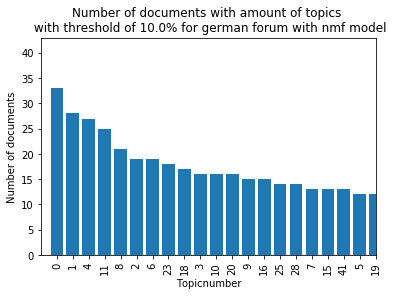

,0,1,2,3,4,5,6,7,8,9
Topic 0,kaufe,bio,kaufen,lg,gemüse,schmecken,einfach,supermarkt,essen,leisten
Topic 1,bio,lebensmittel,gesünder,produkt,bio-siegel,normal,drauf,normale,meinung,bier
Topic 4,landwirtschaft,ökologisch,konventionell,biologische,thema,begreifen,berücksichtigung,biologisch,erzeugnis,merkmal
Topic 11,fleisch,essen,metzger,jed,rind,wurst,kaufen,haltung,selber,geflügel
Topic 8,gemüse,obst,normal,usa,gesund,halt,saison,waschen,gesünder,vitamin
Topic 2,tier,haltung,schlachten,töten,sterben,leben,schwein,veganer,artgerecht,vegetarier
Topic 6,eiern,huhn,legen,bioeier,bodenhaltung,dotter,bio-eier,weiße,jed,braune
Topic 23,bioprodukt,gesünder,studie,belegen,regelmäßig,ernährung,inhaltsstoffe,essen,fühlen,produkt
Topic 18,apfel,belag,schimmeln,waschen,schokolade,fett,egal,schalen,kg,steuer
Topic 3,<url>,blog,blogs,bio-markt,suchen,lifestyle,empfehlenswert,finden,kleidung,straße


In [7]:
model_gf = "topic_models/nmf/DEFO_nmf_german_forum_170.pkl"

document_topic_matrix_gf,topicmodel_gf = vis.get_document_topic_matrix(model_gf)
k_gf, v_gf = vis.amount_topic_per_dokument(threshold, document_topic_matrix_gf)
vis.plot_amount_topic_per_document(model_gf,threshold, k_gf, v_gf)
#vis.plot_amount_doc_per_topic(threshold, document_topic_matrix,x_limit, sorted = False)
vis.plot_amount_doc_per_topic(model_gf,threshold,190,sorted = True)
vis.plot_amount_doc_per_topic(model_gf,threshold,x_limit,sorted = True,bar = True)

Epoch 10 reached after 0.340 seconds, error: 11.907524
Epoch 20 reached after 0.454 seconds, error: 11.848256
Epoch 30 reached after 0.570 seconds, error: 11.836957
Epoch 40 reached after 0.670 seconds, error: 11.833179
Epoch 50 reached after 0.770 seconds, error: 11.831541
Epoch 60 reached after 0.902 seconds, error: 11.830713
Epoch 70 reached after 1.040 seconds, error: 11.830248
Epoch 80 reached after 1.156 seconds, error: 11.829967
Epoch 90 reached after 1.272 seconds, error: 11.829786
Epoch 100 reached after 1.387 seconds, error: 11.829665
Epoch 110 reached after 1.503 seconds, error: 11.829580
Epoch 120 reached after 1.626 seconds, error: 11.829519
Epoch 130 reached after 1.741 seconds, error: 11.829474
Epoch 140 reached after 1.873 seconds, error: 11.829440
Epoch 150 reached after 1.989 seconds, error: 11.829414
Epoch 160 reached after 2.105 seconds, error: 11.829394
Epoch 170 reached after 2.221 seconds, error: 11.829377
Epoch 180 reached after 2.331 seconds, error: 11.829364
E

C:\Users\Maria\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1035: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


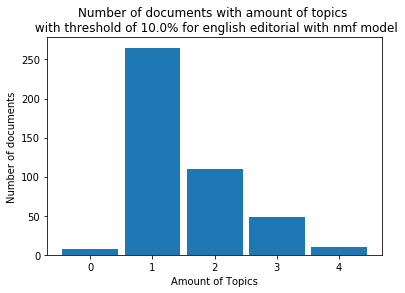

Epoch 10 reached after 0.282 seconds, error: 11.907524
Epoch 20 reached after 0.413 seconds, error: 11.848256
Epoch 30 reached after 0.545 seconds, error: 11.836957
Epoch 40 reached after 0.676 seconds, error: 11.833179
Epoch 50 reached after 0.786 seconds, error: 11.831541
Epoch 60 reached after 0.917 seconds, error: 11.830713
Epoch 70 reached after 1.056 seconds, error: 11.830248
Epoch 80 reached after 1.170 seconds, error: 11.829967
Epoch 90 reached after 1.292 seconds, error: 11.829786
Epoch 100 reached after 1.424 seconds, error: 11.829665
Epoch 110 reached after 1.553 seconds, error: 11.829580
Epoch 120 reached after 1.676 seconds, error: 11.829519
Epoch 130 reached after 1.807 seconds, error: 11.829474
Epoch 140 reached after 1.929 seconds, error: 11.829440
Epoch 150 reached after 2.060 seconds, error: 11.829414
Epoch 160 reached after 2.211 seconds, error: 11.829394
Epoch 170 reached after 2.332 seconds, error: 11.829377
Epoch 180 reached after 2.444 seconds, error: 11.829364
E

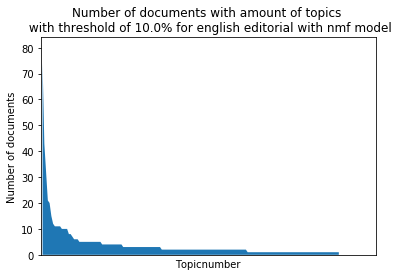

,0,1,2,3,4,5,6,7,8,9
Topic 2,organic,conventional,pesticide,usda,buy,produce,good,grow,farming,non
Topic 0,food,eat,people,make,healthy,health,think,good,buy,grow
Topic 3,gmo,monsanto,gene,label,gm,crop,plant,labeling,modify,seed
Topic 16,pesticide,use,fruit,study,chemical,produce,human,exposure,insect,pest
Topic 1,amazon,foods,bezos,price,grocery,store,shop,employee,walmart,wapo
Topic 5,animal,meat,vegan,eat,plant,diet,vegetarian,base,protein,people
Topic 130,crop,food,genetically,engineer,disease,world,plant,seed,gm,yield
Topic 6,chicken,animal,egg,humane,farm,raise,bird,feed,cruelty,eat
Topic 12,fat,calorie,diet,weight,eat,carb,sugar,exercise,healthy,lose
Topic 27,wf,foods,price,store,shop,food,trader_joe,customer,employee,like


Epoch 10 reached after 0.332 seconds, error: 11.907524
Epoch 20 reached after 0.453 seconds, error: 11.848256
Epoch 30 reached after 0.555 seconds, error: 11.836957
Epoch 40 reached after 0.687 seconds, error: 11.833179
Epoch 50 reached after 0.802 seconds, error: 11.831541
Epoch 60 reached after 0.918 seconds, error: 11.830713
Epoch 70 reached after 1.034 seconds, error: 11.830248
Epoch 80 reached after 1.157 seconds, error: 11.829967
Epoch 90 reached after 1.288 seconds, error: 11.829786
Epoch 100 reached after 1.404 seconds, error: 11.829665
Epoch 110 reached after 1.521 seconds, error: 11.829580
Epoch 120 reached after 1.651 seconds, error: 11.829519
Epoch 130 reached after 1.774 seconds, error: 11.829474
Epoch 140 reached after 1.889 seconds, error: 11.829440
Epoch 150 reached after 2.005 seconds, error: 11.829414
Epoch 160 reached after 2.137 seconds, error: 11.829394
Epoch 170 reached after 2.271 seconds, error: 11.829377
Epoch 180 reached after 2.390 seconds, error: 11.829364
E

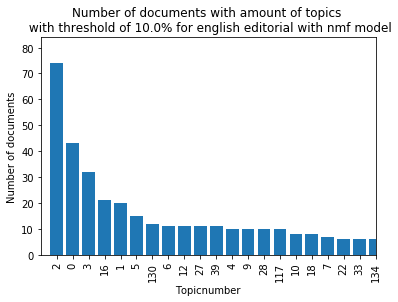

,0,1,2,3,4,5,6,7,8,9
Topic 2,organic,conventional,pesticide,usda,buy,produce,good,grow,farming,non
Topic 0,food,eat,people,make,healthy,health,think,good,buy,grow
Topic 3,gmo,monsanto,gene,label,gm,crop,plant,labeling,modify,seed
Topic 16,pesticide,use,fruit,study,chemical,produce,human,exposure,insect,pest
Topic 1,amazon,foods,bezos,price,grocery,store,shop,employee,walmart,wapo
Topic 5,animal,meat,vegan,eat,plant,diet,vegetarian,base,protein,people
Topic 130,crop,food,genetically,engineer,disease,world,plant,seed,gm,yield
Topic 6,chicken,animal,egg,humane,farm,raise,bird,feed,cruelty,eat
Topic 12,fat,calorie,diet,weight,eat,carb,sugar,exercise,healthy,lose
Topic 27,wf,foods,price,store,shop,food,trader_joe,customer,employee,like


In [8]:
model_eec = "topic_models/nmf/ENEDCO_nmf_english_editorial_comments_170.pkl"

document_topic_matrix_eec,topicmodel_eec = vis.get_document_topic_matrix(model_eec)
k_eec, v_eec = vis.amount_topic_per_dokument(threshold, document_topic_matrix_eec)
vis.plot_amount_topic_per_document(model_eec,threshold, k_eec, v_eec)
#vis.plot_amount_doc_per_topic(threshold, document_topic_matrix,x_limit, sorted = False)
vis.plot_amount_doc_per_topic(model_eec,threshold,190,sorted = True)
vis.plot_amount_doc_per_topic(model_eec,threshold,x_limit,sorted = True,bar = True)